In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Description of Dataset

https://www.kaggle.com/code/dllim1/end-to-end-ml-on-motor-insurance-with-xgboost?cellIds=7&kernelSessionId=107604636

#**Stratetic Plan of Action**  

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**

1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion






## 1. Data Exploration

In [2]:
df = pd.read_csv("car_insurance_claim.csv")
print(df.shape)

(10302, 27)


In [3]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [4]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [6]:
print("Missing Values:" ,  df.isnull().sum())
print()
print("Total missing values :" , df.isnull().sum().sum())
print("Total duplicate values:" , df.duplicated().sum())
print("Rows with missing values:", df.isnull().any(axis = 1).sum())

Missing Values: ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

Total missing values : 3004
Total duplicate values: 1
Rows with missing values: 2645


### 1.2 Basic Data Cleaning

In [7]:
# Create a Population DataFrame copy of the original
original_dataset = df.copy()


# Convert currecy into floats
def convert_currency(df, columns: list):
    for col in columns:
        df[col] = np.where(pd.isnull(df[col]), df[col], df[col].astype('str').map(lambda x: 
                                                                        x.replace(',','').replace('$',''))).astype('float')


# There are some values that have a prefix 'z_' that does not mean anything.
def remove_z(df, columns: list):
    for col in columns:
        df[col] = np.where(pd.isnull(df[col]), df[col], df[col].astype('str').map(lambda x: x.replace('z_','')))


In [8]:
df.drop_duplicates(inplace=True) # removes duplicates

currency_cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
z_cols = ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE','URBANICITY']

convert_currency(df, currency_cols)
remove_z(df, z_cols)

# Rename our target columns with a suffix 'TGT' i.e  so we can visually identify better.
df.rename({'CLM_AMT': 'TGT_CLAIM_AMT', 'CLAIM_FLAG': 'TGT_CLAIM_FLAG'}, axis=1, inplace=True)

# These columns don't add any value. 'BIRTH' is redundant with the 'AGE' column present
df.drop(['BIRTH','ID'], axis=1, inplace=True);

In [9]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

CAR_USE              2
REVOKED              2
RED_CAR              2
TGT_CLAIM_FLAG       2
GENDER               2
MSTATUS              2
URBANICITY           2
PARENT1              2
EDUCATION            5
KIDSDRIV             5
HOMEKIDS             6
CLM_FREQ             6
CAR_TYPE             6
OCCUPATION           8
MVR_PTS             14
YOJ                 21
TIF                 23
CAR_AGE             30
AGE                 61
TRAVTIME           100
TGT_CLAIM_AMT     2346
BLUEBOOK          2985
OLDCLAIM          3545
HOME_VAL          6334
INCOME            8151
dtype: int64

In [10]:
# Let's define the categorical columns and numerical columns which will be later used as features

categorical_cols = [col for col in df.columns if (df[col].nunique() < 10) and (df[col].dtype == "object") and
                    col not in ['TGT_CLAIM_AMT','TGT_CLAIM_FLAG']]

numerical_cols = [col for col in df.columns if (df[col].dtype in ['int64', 'float64']) and
                  col not in ['TGT_CLAIM_AMT','TGT_CLAIM_FLAG']]

print('Number of Numerical columns   :',len(numerical_cols))
print('Number of Categorical columns :',len(categorical_cols))

Number of Numerical columns   : 13
Number of Categorical columns : 10


**Sanity Check:**  

1) If there is no claim, therefore amount should be zero  


2) If there is claim , amount should be greater than zero

In [11]:
# 1
len( df[(df['TGT_CLAIM_FLAG'] == False) & (df['TGT_CLAIM_AMT'] > 0)] ) #

0

There is no violation in this part as there are no rows with violation criteria

In [12]:
# 2
len( df[(df['TGT_CLAIM_FLAG'] == True) & (df['TGT_CLAIM_AMT'] <=  0)] )

0

## 2. EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10301 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KIDSDRIV        10301 non-null  int64  
 1   AGE             10294 non-null  float64
 2   HOMEKIDS        10301 non-null  int64  
 3   YOJ             9753 non-null   float64
 4   INCOME          9731 non-null   float64
 5   PARENT1         10301 non-null  object 
 6   HOME_VAL        9726 non-null   float64
 7   MSTATUS         10301 non-null  object 
 8   GENDER          10301 non-null  object 
 9   EDUCATION       10301 non-null  object 
 10  OCCUPATION      9636 non-null   object 
 11  TRAVTIME        10301 non-null  int64  
 12  CAR_USE         10301 non-null  object 
 13  BLUEBOOK        10301 non-null  float64
 14  TIF             10301 non-null  int64  
 15  CAR_TYPE        10301 non-null  object 
 16  RED_CAR         10301 non-null  object 
 17  OLDCLAIM        10301 non-null 

In [14]:
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Total Missing Values: {df.isna().sum().sum()}")
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

Duplicates: 0
Total Missing Values: 3004
Number of rows with missing values: 2645


### 2.1 Features Distribution

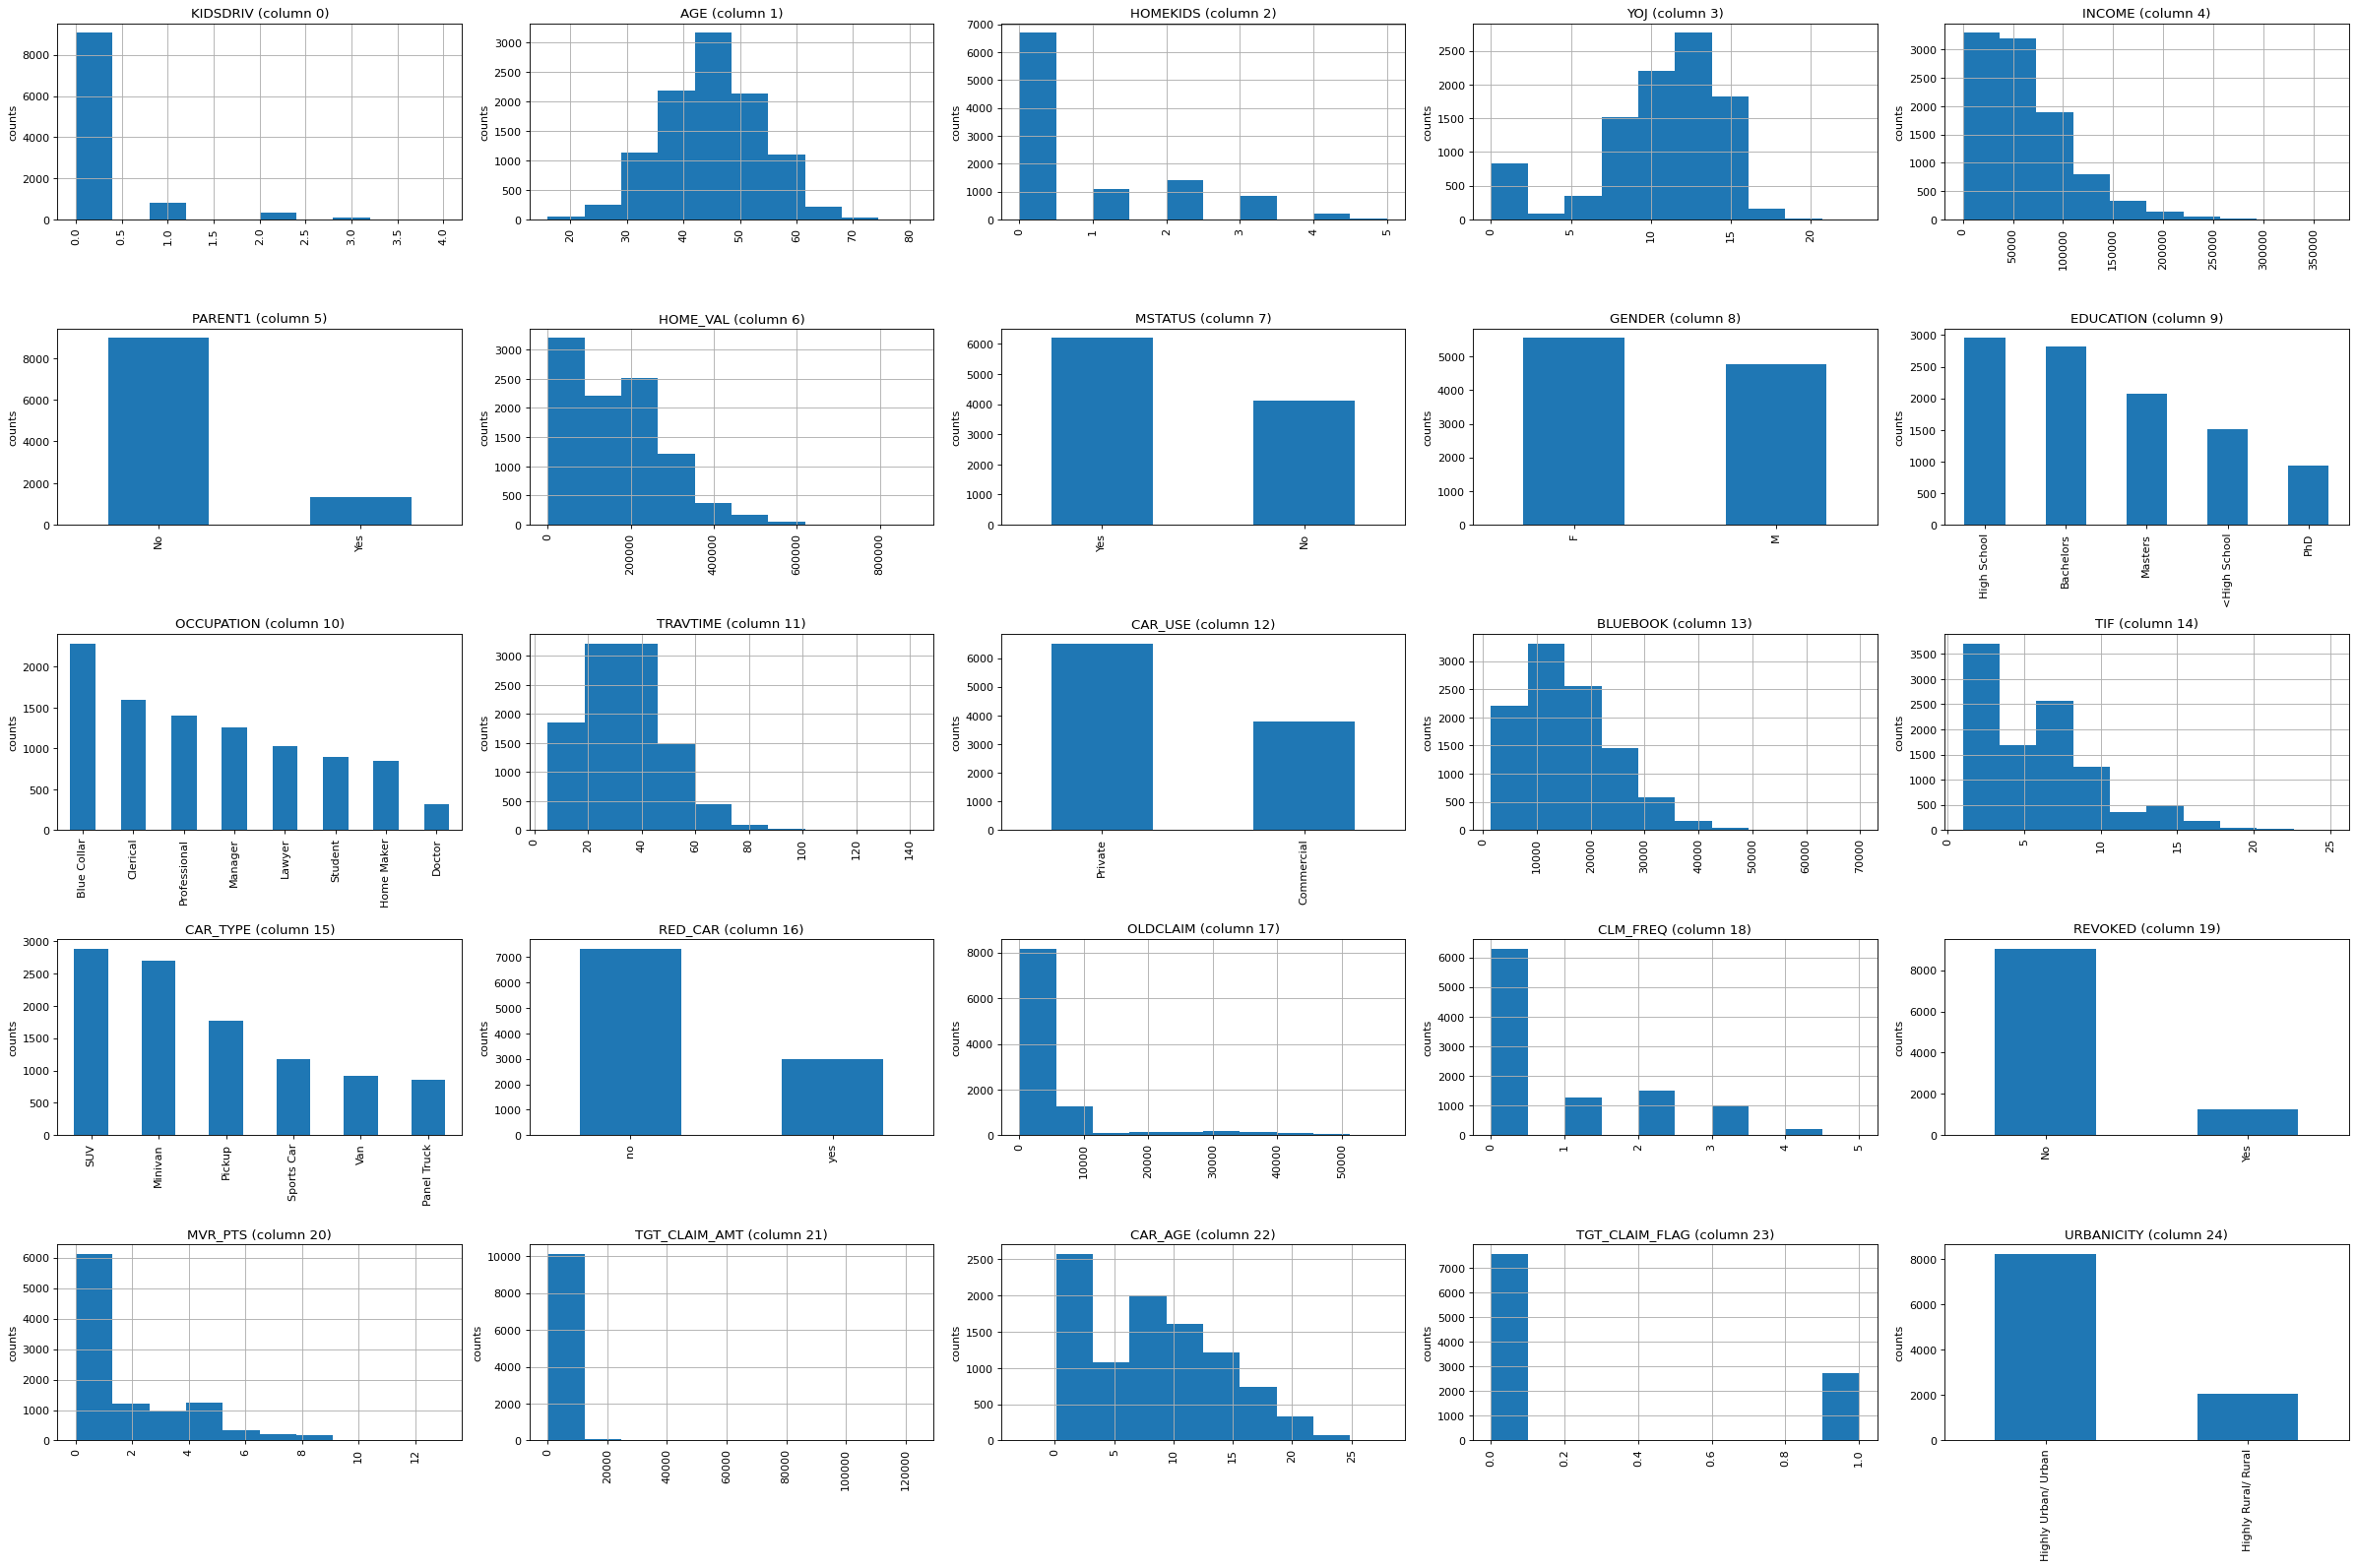

In [15]:
def plot_col_distribution(df, n_graph_per_row):
    n_col = df.shape[1]
    column_names = list(df)
    n_graph_row = (n_col + n_graph_per_row - 1) // n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 4 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(n_col):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_df = df.iloc[:, i]
        if (not np.issubdtype(type(column_df.iloc[0]), np.number)):
            column_df.value_counts().plot.bar()
        else:
            column_df.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plot_col_distribution(df,5)

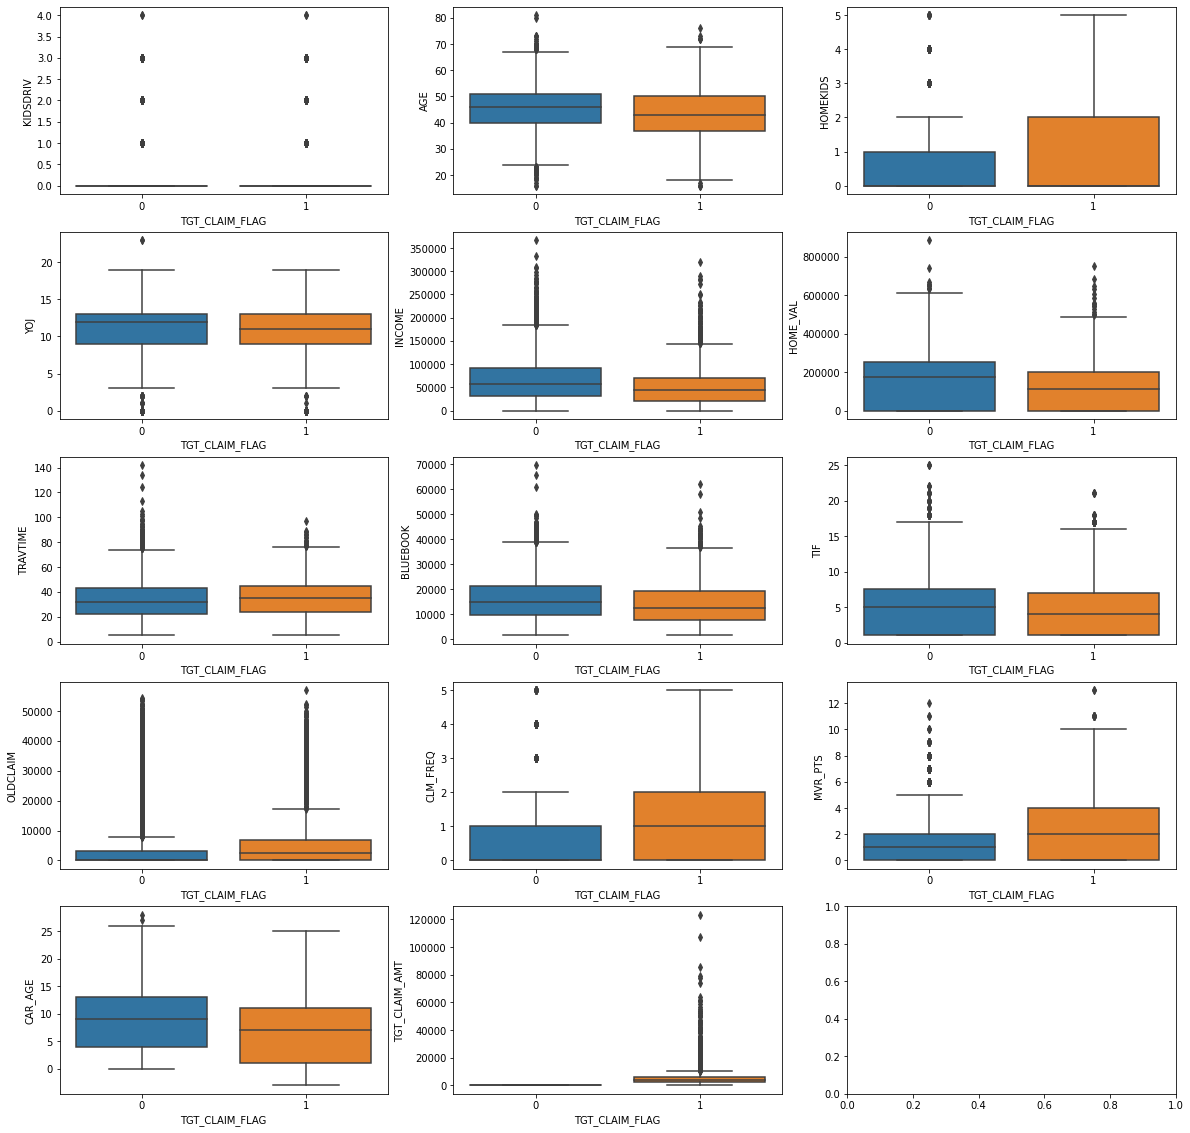

In [16]:
def plot_boxplot_by_claim_flag(df,cols):

    n_rows, n_cols = (len(cols) // 3) + 1, 3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (20,20))
    
    i = 0
    for col in cols:
        j = i//n_cols
        k = i%n_cols
        sns.boxplot(data  = df , y=col, x='TGT_CLAIM_FLAG', ax=axis[j,k])
        i +=1
        
all_num_cols = numerical_cols + ['TGT_CLAIM_AMT']
plot_boxplot_by_claim_flag(df ,all_num_cols)

In [17]:
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df['OLDCLAIM'],90+i))

90 percentile value is 9543.0
91 percentile value is 10377.0
92 percentile value is 11963.0
93 percentile value is 18535.0
94 percentile value is 23060.0
95 percentile value is 26871.0
96 percentile value is 30328.0
97 percentile value is 33399.0
98 percentile value is 37404.0
99 percentile value is 42642.0
100 percentile value is 57037.0


In [18]:
for i in range(0,11):
    print(99+ (i*(0.1)),'percentile value is',np.percentile(df['OLDCLAIM'],99+(i* 0.1)))

99.0 percentile value is 42642.0
99.1 percentile value is 43217.19999999992
99.2 percentile value is 44021.40000000001
99.3 percentile value is 44698.59999999999
99.4 percentile value is 45372.80000000006
99.5 percentile value is 46612.5
99.6 percentile value is 47379.79999999997
99.7 percentile value is 48756.000000000044
99.8 percentile value is 49624.19999999999
99.9 percentile value is 51810.70000000023
100.0 percentile value is 57037.0


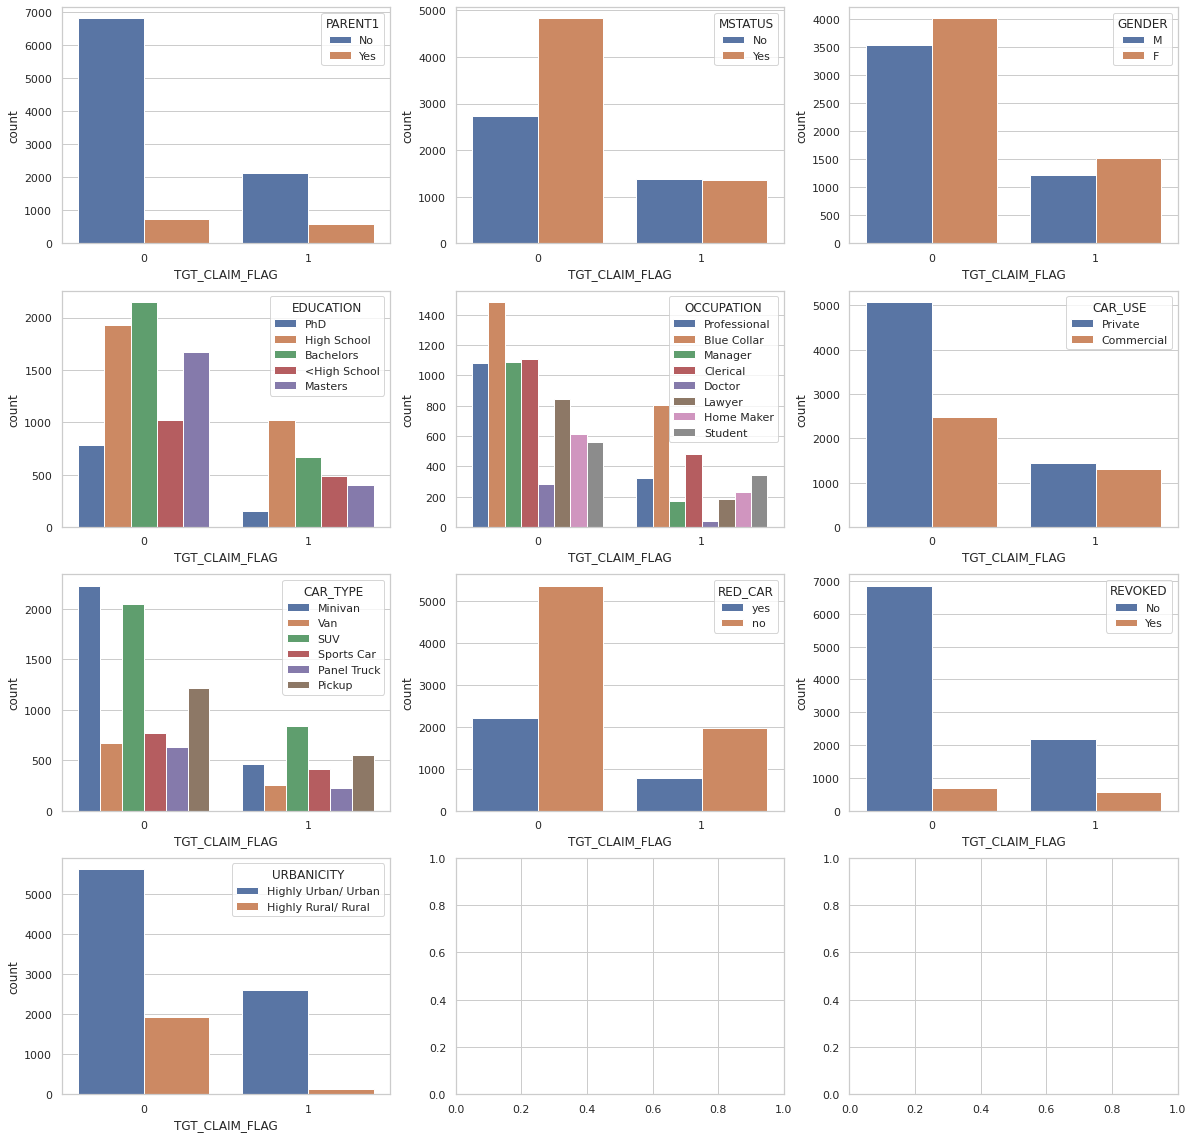

In [19]:
def plot_countplot_by_claim_flag(df,cols):
    sns.set_theme(style="whitegrid")

    n_rows, n_cols = (len(cols) // 3) + 1, 3
    figure, axis = plt.subplots(n_rows, n_cols, figsize = (20,20))
    
    i = 0
    for col in cols:
        j = i//n_cols
        k = i%n_cols
        sns.countplot(data  = df , x='TGT_CLAIM_FLAG', hue = col, ax=axis[j,k])
        i +=1
        
all_cat_cols = categorical_cols 
plot_countplot_by_claim_flag(df ,all_cat_cols)

### 2.2 Correlation Matrix

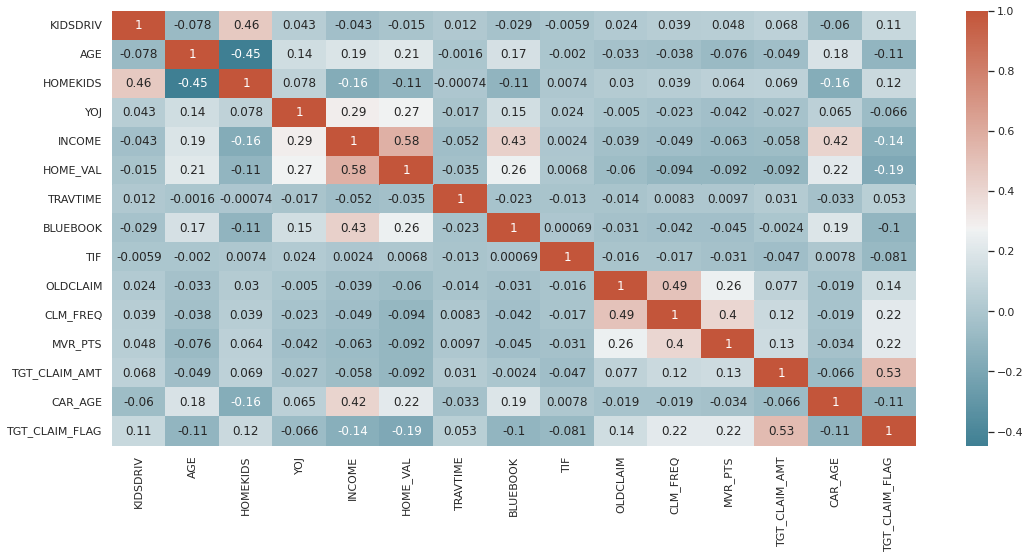

In [20]:
def plot_corr(df):
    corr = df.corr()
    sns.set_theme()
    plt.figure(figsize = (18,8))
    sns.heatmap(corr, cbar=True, annot=True, cmap= sns.diverging_palette(220, 20, as_cmap=True))

plot_corr(df)

## Splitting the test set
Now that$ we have a good clean set to work with, we'll assume newer data coming in will be in this form going forward.

In [21]:
target = df['TGT_CLAIM_FLAG']
features = df.drop(columns = ['TGT_CLAIM_FLAG', 'TGT_CLAIM_AMT'] )

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(features , target)

In [23]:
x_train.shape , y_train.shape

((7725, 23), (7725,))

In [24]:
vc = y_train.value_counts()
x_axis = [0,1]
y_axis = [(vc[0] / (vc[0] + vc[1] ))*100 , (vc[1] / (vc[0] + vc[1] ))*100]

print(y_axis)

[73.3462783171521, 26.653721682847898]


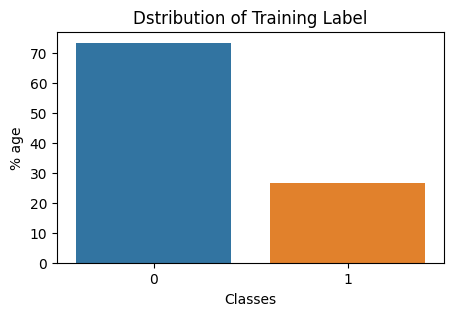

In [25]:
plt.style.use("default")
plt.figure(figsize = (5,3))
plt.title("Dstribution of Training Label")
plt.xlabel("Classes")
plt.ylabel("% age")
sns.barplot(x = x_axis , y = y_axis)
plt.show()

[73.33074534161491, 26.669254658385093]


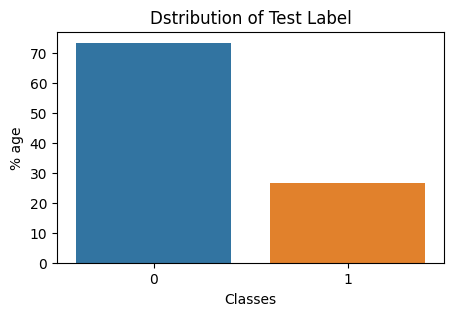

In [26]:
vc1 = y_test.value_counts()
x_axis = [0,1]
y_axis = [(vc1[0] / (vc1[0] + vc1[1] ))*100 , (vc1[1] / (vc1[0] + vc1[1] ))*100]

print(y_axis)

plt.style.use("default")
plt.figure(figsize = (5,3))
plt.title("Dstribution of Test Label")
plt.xlabel("Classes")
plt.ylabel("% age")
sns.barplot(x = x_axis , y = y_axis)
plt.show()

## Feature Engineering

### 4.1 Removing Outliers

In [27]:
x_train.shape

(7725, 23)

In [28]:
x_train['OLDCLAIM'].isnull().sum()

0

In [29]:
def remove_outliers(dataframe , col, val):

    dataframe[col] = np.where(dataframe[col] > np.percentile(dataframe[col], val), np.nan, dataframe[col])

    return dataframe

In [30]:
train1 = remove_outliers(x_train, 'OLDCLAIM', 99.9)

In [31]:
train1.shape

(7725, 23)

In [32]:
train1['OLDCLAIM'].isnull().sum()

8

In [33]:
from sklearn.preprocessing import FunctionTransformer
outliers = FunctionTransformer(remove_outliers,
                     kw_args={'col':['OLDCLAIM'] , 
                               'val': 99.9})

In [34]:
x_train = outliers.fit_transform(x_train)

In [35]:
x_train.shape

(7725, 23)

In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 1132 to 7288
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    7725 non-null   int64  
 1   AGE         7720 non-null   float64
 2   HOMEKIDS    7725 non-null   int64  
 3   YOJ         7311 non-null   float64
 4   INCOME      7292 non-null   float64
 5   PARENT1     7725 non-null   object 
 6   HOME_VAL    7291 non-null   float64
 7   MSTATUS     7725 non-null   object 
 8   GENDER      7725 non-null   object 
 9   EDUCATION   7725 non-null   object 
 10  OCCUPATION  7252 non-null   object 
 11  TRAVTIME    7725 non-null   int64  
 12  CAR_USE     7725 non-null   object 
 13  BLUEBOOK    7725 non-null   float64
 14  TIF         7725 non-null   int64  
 15  CAR_TYPE    7725 non-null   object 
 16  RED_CAR     7725 non-null   object 
 17  OLDCLAIM    7717 non-null   float64
 18  CLM_FREQ    7725 non-null   int64  
 19  REVOKED     7725 non-nul

### 4.2 Imputing Values

In [37]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
                        ('num_transform' , KNNImputer(n_neighbors=3), numerical_cols),
                        ('cat_transform' , SimpleImputer( strategy = 'most_frequent') , categorical_cols),  
])
ct.fit(x_train)

ColumnTransformer(transformers=[('num_transform', KNNImputer(n_neighbors=3),
                                 ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
                                  'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK',
                                  'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS',
                                  'CAR_AGE']),
                                ('cat_transform',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION',
                                  'OCCUPATION', 'CAR_USE', 'CAR_TYPE',
                                  'RED_CAR', 'REVOKED', 'URBANICITY'])])

In [38]:
x_train_ct = ct.transform(x_train)

In [39]:
x_train_ct = pd.DataFrame(x_train_ct , columns = numerical_cols + categorical_cols)

In [40]:
x_train_ct.isnull().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
HOME_VAL      0
TRAVTIME      0
BLUEBOOK      0
TIF           0
OLDCLAIM      0
CLM_FREQ      0
MVR_PTS       0
CAR_AGE       0
PARENT1       0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
CAR_USE       0
CAR_TYPE      0
RED_CAR       0
REVOKED       0
URBANICITY    0
dtype: int64

In [41]:
x_train_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   KIDSDRIV    7725 non-null   object
 1   AGE         7725 non-null   object
 2   HOMEKIDS    7725 non-null   object
 3   YOJ         7725 non-null   object
 4   INCOME      7725 non-null   object
 5   HOME_VAL    7725 non-null   object
 6   TRAVTIME    7725 non-null   object
 7   BLUEBOOK    7725 non-null   object
 8   TIF         7725 non-null   object
 9   OLDCLAIM    7725 non-null   object
 10  CLM_FREQ    7725 non-null   object
 11  MVR_PTS     7725 non-null   object
 12  CAR_AGE     7725 non-null   object
 13  PARENT1     7725 non-null   object
 14  MSTATUS     7725 non-null   object
 15  GENDER      7725 non-null   object
 16  EDUCATION   7725 non-null   object
 17  OCCUPATION  7725 non-null   object
 18  CAR_USE     7725 non-null   object
 19  CAR_TYPE    7725 non-null   object
 20  RED_CAR 

In [42]:
x_train_ct = pd.concat([ x_train_ct[numerical_cols].astype(np.float64) ,  x_train_ct[categorical_cols] ] , axis = 1)

In [43]:
x_train_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    7725 non-null   float64
 1   AGE         7725 non-null   float64
 2   HOMEKIDS    7725 non-null   float64
 3   YOJ         7725 non-null   float64
 4   INCOME      7725 non-null   float64
 5   HOME_VAL    7725 non-null   float64
 6   TRAVTIME    7725 non-null   float64
 7   BLUEBOOK    7725 non-null   float64
 8   TIF         7725 non-null   float64
 9   OLDCLAIM    7725 non-null   float64
 10  CLM_FREQ    7725 non-null   float64
 11  MVR_PTS     7725 non-null   float64
 12  CAR_AGE     7725 non-null   float64
 13  PARENT1     7725 non-null   object 
 14  MSTATUS     7725 non-null   object 
 15  GENDER      7725 non-null   object 
 16  EDUCATION   7725 non-null   object 
 17  OCCUPATION  7725 non-null   object 
 18  CAR_USE     7725 non-null   object 
 19  CAR_TYPE    7725 non-null  

### 4.3 Encoding Categorical cols , Standardized Numerical cols

In [44]:
ordinal = ['EDUCATION']
binary = ['PARENT1','MSTATUS','GENDER','CAR_USE','RED_CAR','REVOKED','URBANICITY']
one_hot = ['CAR_TYPE', 'OCCUPATION']

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

edu_ordinal = [['<High School','High School','Bachelors','Masters','PhD']]

ordinal_edu = OrdinalEncoder(categories= edu_ordinal)

ordinal_binary = OrdinalEncoder()

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [46]:
education = pd.DataFrame(ordinal_edu.fit_transform(x_train_ct[ordinal]) , columns = ordinal)
education.head()

,EDUCATION
0,3.0
1,3.0
2,3.0
3,1.0
4,3.0


In [47]:
binary_features = pd.DataFrame(ordinal_binary.fit_transform(x_train_ct[binary]) , columns = binary)
binary_features.head()

,PARENT1,MSTATUS,GENDER,CAR_USE,RED_CAR,REVOKED,URBANICITY
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [48]:
ohe_features = pd.DataFrame(ohe.fit_transform(x_train_ct[one_hot]))
ohe_features.columns = ohe.get_feature_names_out()

In [49]:
ohe_features.head()

,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
# Joining all the encoded features
x_train_processed = pd.concat([x_train_ct[numerical_cols], education, binary_features, ohe_features ] , axis = 1)
x_train_processed.shape

(7725, 35)

In [51]:
x_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 7725 non-null   float64
 1   AGE                      7725 non-null   float64
 2   HOMEKIDS                 7725 non-null   float64
 3   YOJ                      7725 non-null   float64
 4   INCOME                   7725 non-null   float64
 5   HOME_VAL                 7725 non-null   float64
 6   TRAVTIME                 7725 non-null   float64
 7   BLUEBOOK                 7725 non-null   float64
 8   TIF                      7725 non-null   float64
 9   OLDCLAIM                 7725 non-null   float64
 10  CLM_FREQ                 7725 non-null   float64
 11  MVR_PTS                  7725 non-null   float64
 12  CAR_AGE                  7725 non-null   float64
 13  EDUCATION                7725 non-null   float64
 14  PARENT1                 

### 4.4 Balancing the Dataset

In [52]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(x_train_processed, y_train)

In [53]:
X.shape , y.shape

((11332, 35), (11332,))

[50.0, 50.0]


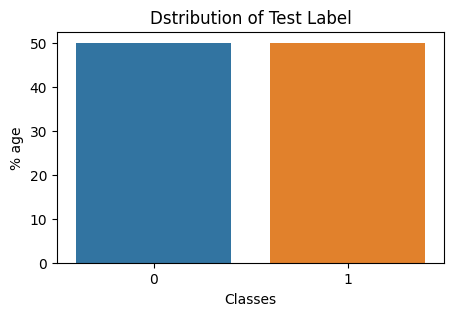

In [54]:
vc1 = y.value_counts()
x_axis = [0,1]
y_axis = [(vc1[0] / (vc1[0] + vc1[1] ))*100 , (vc1[1] / (vc1[0] + vc1[1] ))*100]

print(y_axis)

plt.style.use("default")
plt.figure(figsize = (5,3))
plt.title("Dstribution of Test Label")
plt.xlabel("Classes")
plt.ylabel("% age")
sns.barplot(x = x_axis , y = y_axis)
plt.show()

In [55]:
x_train_smote , y_train_smote = X , y

In [56]:
x_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 11332 non-null  float64
 1   AGE                      11332 non-null  float64
 2   HOMEKIDS                 11332 non-null  float64
 3   YOJ                      11332 non-null  float64
 4   INCOME                   11332 non-null  float64
 5   HOME_VAL                 11332 non-null  float64
 6   TRAVTIME                 11332 non-null  float64
 7   BLUEBOOK                 11332 non-null  float64
 8   TIF                      11332 non-null  float64
 9   OLDCLAIM                 11332 non-null  float64
 10  CLM_FREQ                 11332 non-null  float64
 11  MVR_PTS                  11332 non-null  float64
 12  CAR_AGE                  11332 non-null  float64
 13  EDUCATION                11332 non-null  float64
 14  PARENT1               

### 4.5 Dummy Variable Trap

Checking multicollinearity.
Often times it occurs due to one_hot_encoding

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [58]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [vif(df.values, i) for i in range(len(df.columns))]

    return vif_data

In [59]:
vif_training_data = calculate_vif(x_train_smote)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [60]:
vif_training_data[vif_training_data["VIF"] > 5]

,feature,VIF
21,CAR_TYPE_Minivan,inf
22,CAR_TYPE_Panel Truck,inf
23,CAR_TYPE_Pickup,inf
24,CAR_TYPE_SUV,inf
25,CAR_TYPE_Sports Car,inf
26,CAR_TYPE_Van,inf
27,OCCUPATION_Blue Collar,inf
28,OCCUPATION_Clerical,inf
29,OCCUPATION_Doctor,inf
30,OCCUPATION_Home Maker,inf


As expected, the one-hot encoded variables displayed infinite VIF, which means we have to drop one of each of the newly encoded features.

In [61]:
x_train_smote.drop(['CAR_TYPE_Minivan','OCCUPATION_Blue Collar'], axis=1, inplace = True)

In [62]:
vif_training_data = calculate_vif(x_train_smote)
vif_training_data[vif_training_data["VIF"] > 5]

,feature,VIF
1,AGE,28.856181
3,YOJ,11.116033
4,INCOME,7.513925
5,HOME_VAL,5.087587
6,TRAVTIME,5.880057
7,BLUEBOOK,8.795135
12,CAR_AGE,6.261851
13,EDUCATION,10.499457
15,MSTATUS,5.038415
16,GENDER,6.092723


### 4.7 Standardization of numerical data

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numerical_scaled_features = pd.DataFrame( ss.fit_transform(x_train_smote[numerical_cols]), columns = numerical_cols)

numerical_scaled_features.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
0,-0.395476,0.548835,-0.737555,0.162351,0.833773,3.553191,-1.119711,2.945798,-1.078975,-0.510436,-0.801880,0.460466,2.262635
1,5.465699,1.022465,-0.737555,-0.083151,0.009796,0.359924,0.684851,-1.170116,-1.078975,-0.510436,-0.801880,-0.906475,1.322721
2,1.558249,-0.043203,1.101353,1.635367,3.257539,-1.141065,-0.117176,2.416345,2.800738,1.079787,0.929312,-0.906475,0.320145
3,-0.395476,-0.280018,2.020807,1.389864,-0.487779,-0.131861,-0.317683,-1.235527,1.248853,2.237325,0.063716,1.371759,-1.309040
4,-0.395476,1.969725,-0.737555,0.162351,0.085619,0.691539,0.818523,0.288658,-1.078975,-0.510436,-0.801880,1.371759,0.006841


In [65]:
x_train_final = pd.concat([numerical_scaled_features , x_train_smote.iloc[: , 13:]], axis = 1)
x_train_final.shape

(11332, 33)

In [66]:
x_train_smote.shape

(11332, 33)

In [67]:
# save training file to do modelling
x_train_final.to_csv('train_data_processed.csv')